In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from pprint import pprint

from config import api

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
filename = "no_duplicate_official_tweets.json"
with open(filename) as json_data:
    official_tweets = json.load(json_data)

In [48]:
topandas = []
topandas2 = []
friends = []
for tweet in official_tweets:
    for mentions in tweet["entities"]["user_mentions"]:
        if(mentions["screen_name"]):
            screenname = mentions["screen_name"]
            screenid = int(mentions["id_str"])
            topandas.append({
                    "Name": screenname,
                    "Id": screenid
                })
            if screenname not in friends:
                topandas2.append({
                    "Name": screenname,
                    "Id": screenid
                })
                friends.append(screenname)

In [52]:
df = pd.DataFrame(topandas)
df2 = pd.DataFrame(topandas2)
df = df.loc[:1574] # as it turns out there were quite a few duplicates at the end of my so called 'no-duplicates' file oops

In [89]:
mentions = df["Name"].value_counts()
morethanfive = mentions.loc[mentions >=5]
morethanfive

GameOfThrones      338
HBO                168
Djawadi_Ramin       48
NiceQueenCersei     22
EW                  19
LordSnow            18
JamesHibberd        16
SophieT             15
GoT_Tyrion          14
Snapchat            14
kimrrenfro          13
ringer              13
GIPHY               11
Maisie_Williams      9
LiveNation           8
Isaac_H_Wright       7
Nationals            7
liamcunningham1      7
missnemmanuel        6
RaleighRitchie       6
nikolajcw            6
IISuperwomanII       6
OriginalFunko        6
theforum             6
johnbradleywest      6
VeepHBO              5
lizroldancbs4        5
SFGiants             5
theIRC               5
lovegwendoline       5
reddit               5
Twitter              5
Name: Name, dtype: int64

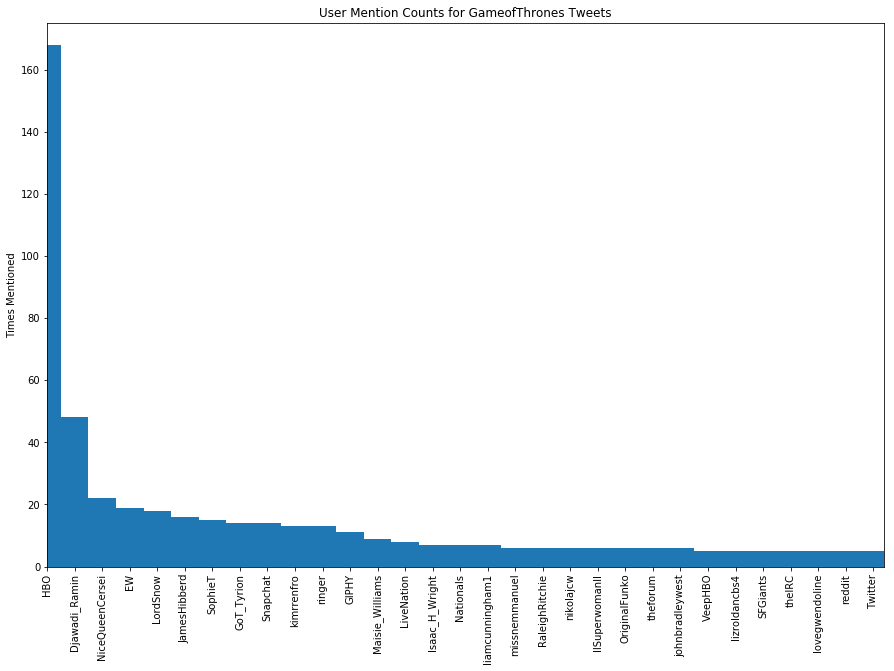

In [92]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(morethanfive))
plt.bar(x_axis, morethanfive, width=1)
plt.xticks(x_axis, morethanfive.keys(), rotation=90)
plt.title("User Mention Counts for GameofThrones Tweets")
plt.ylabel("Times Mentioned")
plt.xlim(1, len(x_axis) - 0.6)
plt.ylim(0, 175)
plt.show()

In [135]:
type_list = ["marketing",
                "marketing",
                "related",
                "fan",
                "unrelated",
                "fan",
                "influencer",
                "related",
                "fan",
                "unrelated",
                "influencer",
                "unrelated",
               "unrelated",
               "related",
               "unrelated",
               "related",
               "unrelated",
               "related",
               "related",
               "related",
               "related",
               "influencer",
               "marketing",
               "unrelated",
               "related",
               "marketing",
               "influencer",
               "unrelated",
               "unrelated",
               "related",
               "unrelated",
               "unrelated"
        ]
color_dict = {
    "related": "#2B818E",
    "influencer": "#966628",
    "marketing": "#792427",
    "fan": "#C6B6D1",
    "unrelated": "black"
}
color_list = []
for thing in type_list:
    color = color_dict[thing]
    color_list.append(color)
data = pd.DataFrame(morethanfive)
data["Type"] = type_list
data["Color"] = color_list

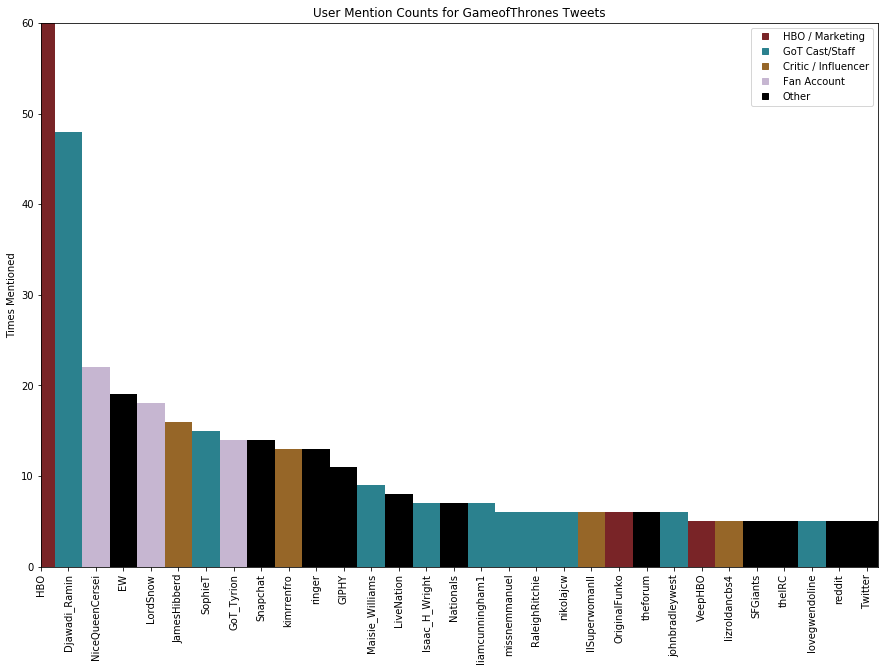

In [137]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(morethanfive))
plt.bar(x_axis, data["Name"], color=data["Color"], width=1)
plt.plot(-500, -500, color="#792427", marker = "s", linewidth=0, label="HBO / Marketing")
plt.plot(-500, -500, color="#2B818E", marker = "s", linewidth=0, label="GoT Cast/Staff")
plt.plot(-500, -500, color="#966628", marker = "s", linewidth=0, label="Critic / Influencer")
plt.plot(-500, -500, color="#C6B6D1", marker = "s", linewidth=0, label="Fan Account")
plt.plot(-500, -500, color="black", marker = "s", linewidth=0, label="Other")
plt.xticks(x_axis, morethanfive.keys(), rotation=90)
plt.title("User Mention Counts for GameofThrones Tweets")
plt.ylabel("Times Mentioned")
plt.xlim(1, len(x_axis) - 0.6)
plt.ylim(0, 60)
plt.legend(loc="best")

plt.savefig("TwitterNetwork.png")
plt.show()